# Histograms

## Initialization

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from matplotlib.colors import NoNorm

In [3]:
# convenience function that estimates the difference between 2 images
def diffscore(img1, img2):
    return np.sum(abs(img1-img2))

# convenience function to draw 1 image - no typing 4 lines anymore
def display(img):
    plt.figure()
    plt.axis("off")
    if len(img.shape) < 3: # no more arguments
        plt.imshow(img,cmap='gray',norm=NoNorm())
        # this ensures plt doesn't treat our grayscale array as a messed-up 3-channel image
    else:
        plt.imshow(img)
    plt.show()

## Why uniform contrast enhancement is inferior

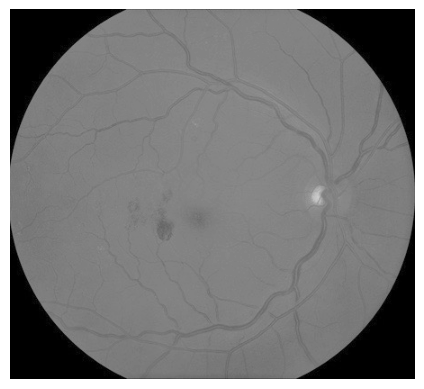

In [4]:
src = cv2.cvtColor(cv2.imread("retina.jpg"), cv2.COLOR_BGR2GRAY)
display(src)

While the details of the image are visible, they are hard to analyze. Therefore, we must improve the contrast.

And to know if the contrast is *really* good, we need to look at the histogram:

In [5]:
def cdf_hist(image):
    hist,bins = np.histogram(image.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')

    plt.hist(image.flatten(),256,[0,256], color = 'r')
    plt.show()

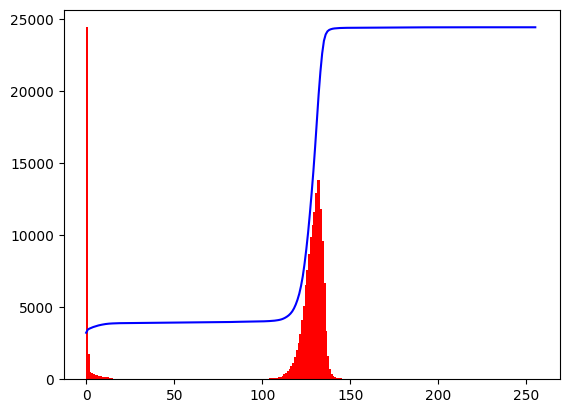

In [6]:
cdf_hist(src)

In [7]:
floatsrc = src.astype(np.float32) /255

#### Contrast enhancement via log transform (10 points)

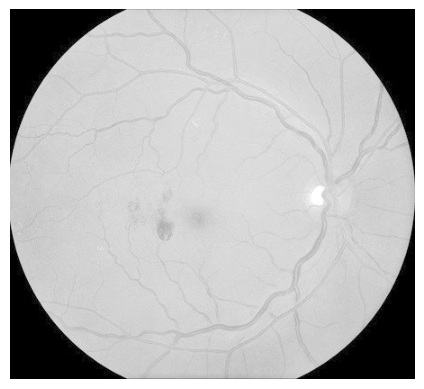

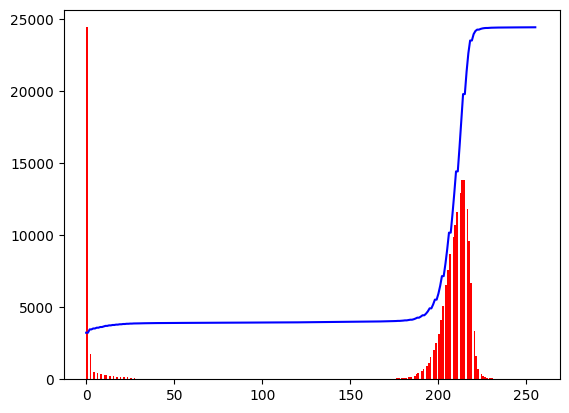

In [8]:
contrasted = floatsrc.copy()

contrasted = 1.4*np.log2(contrasted+1)

display(contrasted)
cdf_hist((contrasted*255).astype(np.int16))

#### Contrast enhancement via power transform (10 points)

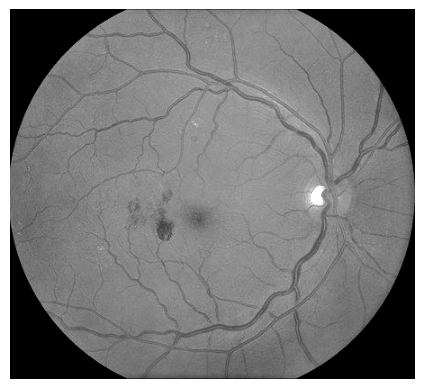

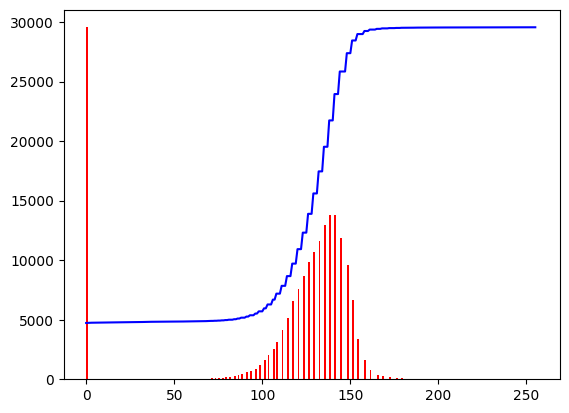

In [9]:
contrasted = floatsrc.copy()

contrasted = 4*np.power(contrasted, 3)

display(contrasted)
cdf_hist((contrasted*255).astype(np.int16))

As you can see, these methods are not perfect when it comes to images that are almost equally intense all over.

This is where histogram equalization comes into play.

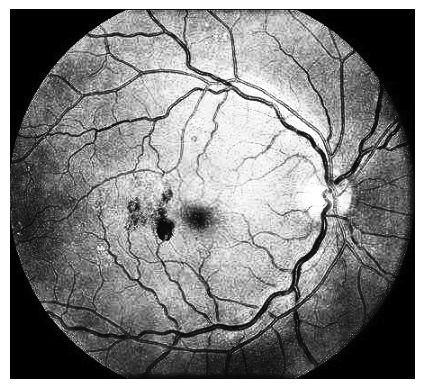

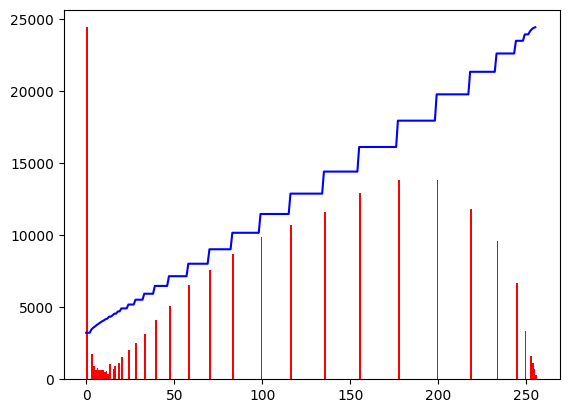

In [10]:
equal = cv2.equalizeHist(src)

display(equal)
cdf_hist(equal)

## Inventing the wheel again

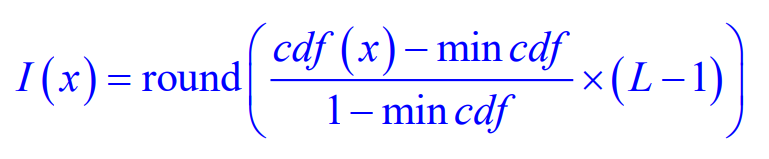

#### Histogram equalization (50 points)

Write a function that would in some way replicate the above without invoking the cv2.equalizeHist() method. You don't really care about the difference score as long as you achieve a similar distribution function.

In [11]:
def your_histeq(image):
    hist,bins = np.histogram(src.flatten(),256,[0,256])
    cdf = hist.cumsum()
    
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = ((cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min()))
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    return cdf[image]

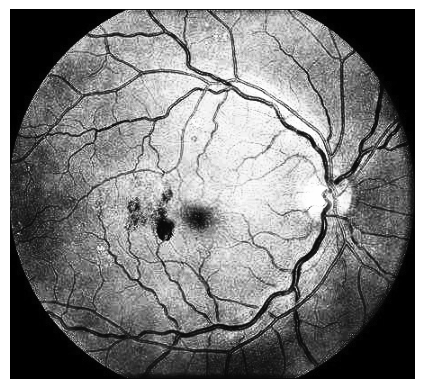

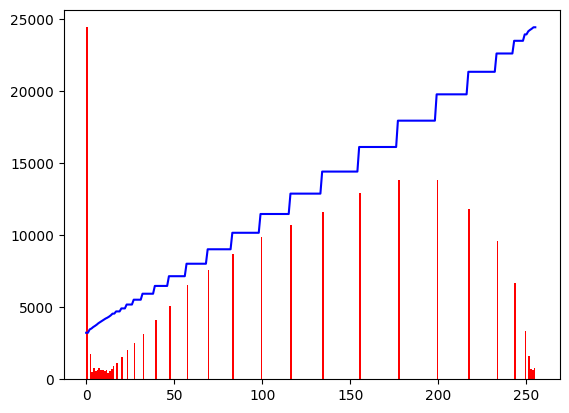

In [12]:
display(your_histeq(src))
cdf_hist(your_histeq(src))

# Homework
Not too much of it this time

#### Why are we here? (15 points)

Explain what a histogram is, what a CDF is, and why equalization is important to us. And in your own words please. Yes, this is not a coding exercise.

Histogram is a is a gray-scale value distribution showing the frequency of occurence of each gray-level value. (It is a discrete function
h(r(kth)) = n(kth). Where r(kth) is the kth gray level in the range of [0, L-1] and n(kth) is the number of pixels having gray level.)

CDF - cumulative distribution function is a function that gives the probability that a random variable is less than or equal to a certain value.
It is calculated by summing up the probabilities of all the possible outcomes of a random variable up to a given value.

Equalization is used in video and image processing to improve the overall visual quality of a picture, making it more vivid, clear, and natural-looking. Picture equalization can be used to correct color imbalances, adjust brightness and contrast, and enhance certain parts of an image or video to make it more visually appealing or informative.

#### Finishing the wheel (15 points)

You might have noticed that we used the np.histogram(array) method to acquire all the values necessary. It does sound a bit like cheating if we are inventing the wheel, does it not?

Write your own function that does not invoke the np.histogram() method *or any equivalent methods from other libraries* and returns the histogram values, either in the same format as the original method, or in a format that you explain below somewhere.

**NB!** Your function only has to work on integers. It does **NOT** have to be robust enough to handle floating inputs for you to get the 15 points.

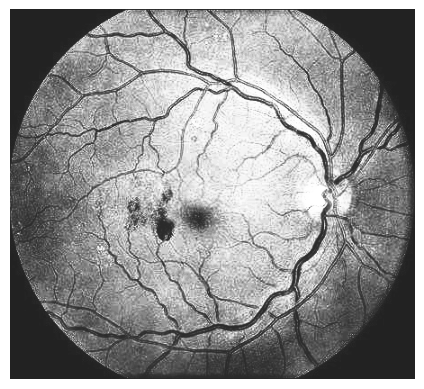

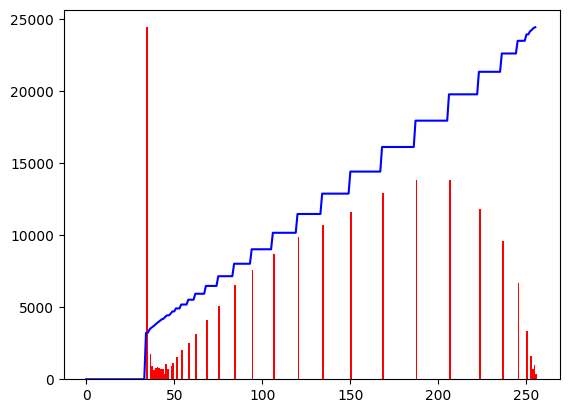

In [23]:
#np.unique(src)

def my_histeq(image):
    hist = np.zeros(256, dtype=np.int32)
    unique, counts = np.unique(image, return_counts=True)
    hist[unique] = counts

    cdf = np.zeros(256, dtype=np.float32)
    cdf[0] = hist[0] / (image.shape[0] * image.shape[1])
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + hist[i] / (image.shape[0] * image.shape[1])

    equalized = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            equalized[i,j] = np.round(cdf[image[i,j]] * 255)

    hist_eq = np.zeros(256, dtype=np.int32)
    unique, counts = np.unique(equalized, return_counts=True)
    hist_eq[unique] = counts

    return equalized, hist_eq



equalized, hist_eq = my_histeq(src)
display(equalized)
cdf_hist(equalized)